In [7]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN,Dropout,Dense

In [2]:
def show_images_labels_predictions(images,labels,predictions,start_id,num=10):#查看多筆訓練資料(數字圖片,真實值,預測值,起始資料,顯示圖片個數)
    plt.gcf().set_size_inches(12,14)
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5, i+1)#顯示黑白圖片
        ax.imshow(images[start_id], cmap = "binary")
        
        #有 AI預測結果資料,才在標題顯示預測結果
        if( len(predictions)>0):
            title = 'ai = ' +str(predictions[i])
            #預測正確顯示(O) 錯誤顯示(X)
            title += (' (O)' if predictions[i] == labels[i] else ' (X)')
            title += '\nlabel = ' + str(labels[i])
        #沒有AI預測結果資料，只在標題顯示真實數值
        else:
            title = 'label = ' +str(labels[i])
            
        #X,Y 軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        start_id += 1
    plt.show

In [3]:
(train_feature ,train_label),(test_feature , test_label) = mnist.load_data()

In [ ]:
#資料預處理

In [ ]:
# Feature特徵值轉換

In [4]:
train_feature_vector = train_feature.reshape(len(train_feature),28,28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

In [ ]:
# Feature特徵值標準化

In [5]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [ ]:
# 轉換 one-hot-encoding

In [6]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [ ]:
#建立循環神經網路模型

In [40]:
model = Sequential()

In [ ]:
#建立Simple RNN層 : 原始圖片為28*28，建立RNN層每一行必須讀取28個像素input_size=28，每一張圖片要讀28次time_steps=28,隱藏層256個神經元

In [41]:
model.add(SimpleRNN(input_shape = (28,28),
                    units = 256,
                    unroll = True))

In [ ]:
#建立拋棄層 : 拋棄比例為10%

In [42]:
model.add(Dropout(0.1))

In [34]:
#建立輸出層 : 輸出神經元為10個

In [43]:
model.add(Dense(units = 10 , 
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [36]:
#訓練模型 : 以compile方法定義loss損失函式 optimizer與metrics

In [44]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [38]:
#進行訓練 : 用fit方法進行訓練，訓練資料保留20%做驗證，因此訓練資料有0.8*60000=48000筆，驗證資料有0.2*60000=12000筆，訓練10次，每次讀200

In [45]:
train_history = model.fit(x = train_feature_normalize,
                          y = train_label_onehot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200 ,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 15s - loss: 0.4248 - accuracy: 0.8752 - val_loss: 0.1820 - val_accuracy: 0.9467
Epoch 2/10
 - 13s - loss: 0.1857 - accuracy: 0.9459 - val_loss: 0.1638 - val_accuracy: 0.9513
Epoch 3/10
 - 13s - loss: 0.1424 - accuracy: 0.9585 - val_loss: 0.1230 - val_accuracy: 0.9653
Epoch 4/10
 - 13s - loss: 0.1209 - accuracy: 0.9644 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 5/10
 - 13s - loss: 0.1097 - accuracy: 0.9674 - val_loss: 0.1159 - val_accuracy: 0.9668
Epoch 6/10
 - 14s - loss: 0.1020 - accuracy: 0.9691 - val_loss: 0.1126 - val_accuracy: 0.9663
Epoch 7/10
 - 15s - loss: 0.0917 - accuracy: 0.9731 - val_loss: 0.1001 - val_accuracy: 0.9714
Epoch 8/10
 - 15s - loss: 0.0820 - accuracy: 0.9765 - val_loss: 0.0955 - val_accuracy: 0.9722
Epoch 9/10
 - 15s - loss: 0.0800 - accuracy: 0.9764 - val_loss: 0.1108 - val_accuracy: 0.9688
Epoch 10/10
 - 15s - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.0996 - val_accuracy: 0.9707


In [ ]:
#評估準確率 : evaluate 可評估模型的損失函式誤差值跟準確率，第0個元素為誤差值，第1個為準確率

In [47]:
scores = model.evaluate(test_feature_normalize , test_label_onehot)
print('\n準確率 = ',scores[1])

10000/10000 [==============================] - 2s 201us/step

準確率 =  0.9731000065803528


In [19]:
#進行預測 : 以predict_classes預測

In [48]:
prediction = model.predict_classes(test_feature_normalize)

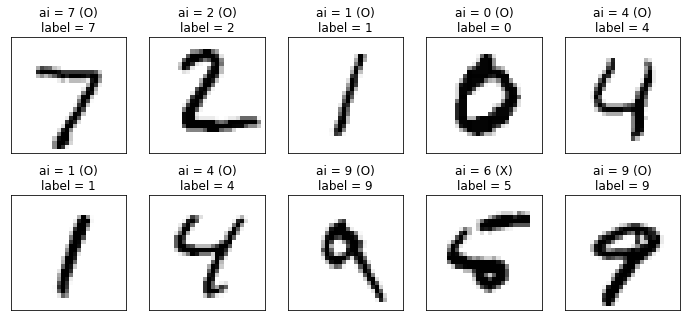

In [49]:
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [46]:
#模型儲存

In [50]:
from keras.layers import SimpleRNN,Dropout,Dense
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
from keras.models import Sequential

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

#將 Features 特徵值換為 60000*28*28 的 3 維矩陣
train_feature_vector =train_feature.reshape(len(train_feature),28,28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

# 建立簡單的線性執行的模型
model = Sequential()
# 加入 SimpleRNN 層
model.add(SimpleRNN(
    # input_shape=(TIME_STEPS, INPUT_SIZE)
    # TIME_STEPS 讀取次數，INPUT_SIZE 每次讀取多少個像素
    input_shape=(28, 28), 
    units=256, # 隱藏層：256 個神經元
    unroll=True, #計算時展開結構
)) 

# Dropout層防止過度擬合，拋棄比例:0.1
model.add(Dropout(0.1))

# 輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 這些訓練會累積，準確會愈來愈高
try:
    model.load_weights("Mnist_Rnn_model.weight")
    print("載入模型參數成功，繼續訓練模型!")
except :    
    print("載入模型失敗，開始訓練一個新模型!")
   
#定義訓練方式:選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)    

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])
    
#將模型儲存至 HDF5檔案中
model.save('Mnist_Rnn_model.h5')
print("Mnist_Rnn_model.h5 模型儲存完畢!")
model.save_weights("Mnist_Rnn_model.weight")
print("模型參數儲存完畢!")

del model  

載入模型失敗，開始訓練一個新模型!
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 21s - loss: 0.4678 - accuracy: 0.8637 - val_loss: 0.2236 - val_accuracy: 0.9345
Epoch 2/10
 - 18s - loss: 0.2092 - accuracy: 0.9393 - val_loss: 0.1728 - val_accuracy: 0.9512
Epoch 3/10
 - 18s - loss: 0.1631 - accuracy: 0.9532 - val_loss: 0.1464 - val_accuracy: 0.9586
Epoch 4/10
 - 18s - loss: 0.1362 - accuracy: 0.9598 - val_loss: 0.1238 - val_accuracy: 0.9622
Epoch 5/10
 - 18s - loss: 0.1136 - accuracy: 0.9659 - val_loss: 0.1305 - val_accuracy: 0.9600
Epoch 6/10
 - 18s - loss: 0.1045 - accuracy: 0.9697 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 7/10
 - 18s - loss: 0.0922 - accuracy: 0.9733 - val_loss: 0.0883 - val_accuracy: 0.9751
Epoch 8/10
 - 18s - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.0889 - val_accuracy: 0.9730
Epoch 9/10
 - 18s - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.1160 - val_accuracy: 0.9697
Epoch 10/10
 - 19s - loss: 0.0752 - accuracy: 0.9778 - val_loss: 0.0833 - val_accuracy

In [ ]:
#載入模型

載入模型 Mnist_Rnn_model.h5


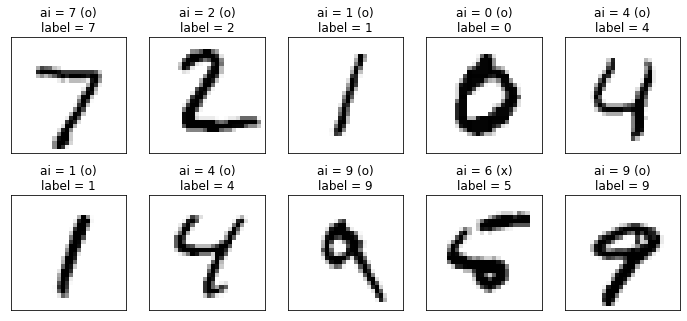

In [51]:
import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#將 Features 特徵值換為 10000*28*28 的 3 維矩陣
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_Rnn_model.h5")
model = load_model('Mnist_Rnn_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [ ]:
#預測自己的數字圖片

載入模型 Mnist_Rnn_model.h5


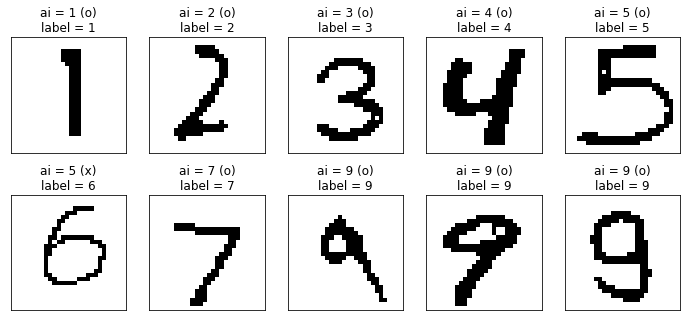

In [52]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()
    
#建立測試特徵集、測試標籤	    
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
   
test_feature=np.array(test_feature) # 串列轉為矩陣 
test_label=np.array(test_label)     # 串列轉為矩陣

#將 Features 特徵值換為 10000*28*28 的 3 維矩陣
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_Rnn_model.h5")
model = load_model('Mnist_Rnn_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0,len(test_feature))

In [ ]:
# LSTM 長短期記憶 

In [53]:
#建立LSTM循環神經網路

In [54]:
from keras.layers.recurrent import LSTM

In [55]:
#model.add(LSTM(input_shape = (TIME_STEPS,INPUT_SIZE),
#                units = CELL_SIZE,
#                unroll = 布林值)

IndentationError: unexpected indent (<ipython-input-55-c48d4d88d6e4>, line 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 69s - loss: 0.6684 - accuracy: 0.7791 - val_loss: 0.2345 - val_accuracy: 0.9246
Epoch 2/10
 - 63s - loss: 0.1880 - accuracy: 0.9433 - val_loss: 0.1284 - val_accuracy: 0.9604
Epoch 3/10
 - 64s - loss: 0.1248 - accuracy: 0.9620 - val_loss: 0.0998 - val_accuracy: 0.9706
Epoch 4/10
 - 65s - loss: 0.0995 - accuracy: 0.9696 - val_loss: 0.0777 - val_accuracy: 0.9771
Epoch 5/10
 - 65s - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.0790 - val_accuracy: 0.9753
Epoch 6/10
 - 68s - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0652 - val_accuracy: 0.9809
Epoch 7/10
 - 66s - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 8/10
 - 64s - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 9/10
 - 65s - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 10/10
 - 65s - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0503 - val_accuracy: 0.9851
10000/100

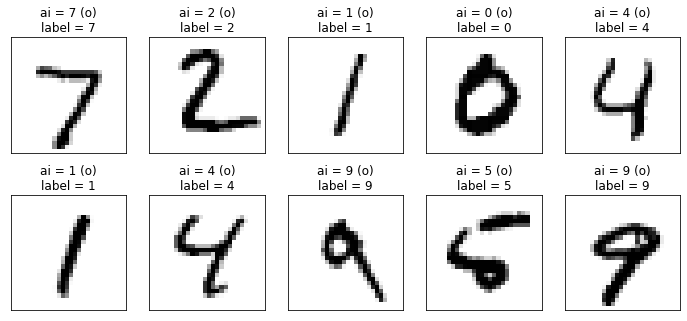

In [60]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

#將 Features 特徵值換為 60000*28*28 的 3 維矩陣
train_feature_vector =train_feature.reshape(len(train_feature),28,28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

# 建立簡單的線性執行的模型
model = Sequential()
model.add(LSTM(
    input_shape=( 28, 28),
    units=256,
    unroll=True
))

# Dropout層防止過度擬合，拋棄比例:0.1
model.add(Dropout(0.1))
 
# 輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
    
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)    

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

#預測
prediction=model.predict_classes(test_feature_normalize)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])
    
#將模型儲存至 HDF5檔案中
model.save('Mnist_Lstm_model.h5')
print("Mnist_Lstm_model.h5 模型儲存完畢!")
model.save_weights("Mnist_Lstm_model.weight")
print("模型參數儲存完畢!")
 

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)  

del model 


In [ ]:
#以LSTM訓練模型檔預測自己繪製的數字圖片

載入模型 Mnist_Lstm_model.h5


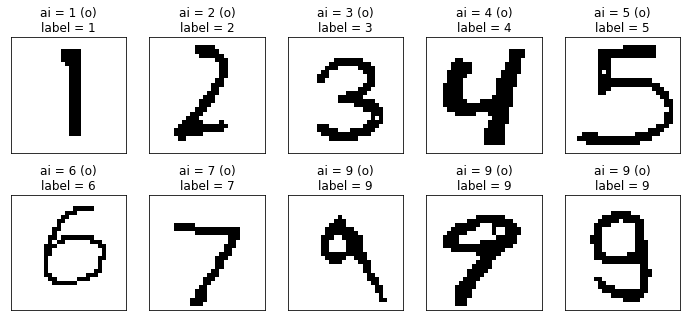

In [61]:

#建立測試特徵集、測試標籤	    
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
   
test_feature=np.array(test_feature) # 串列轉為矩陣 
test_label=np.array(test_label)     # 串列轉為矩陣

#將 Features 特徵值換為 10000*28*28 的 3 維矩陣
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_Lstm_model.h5")
model = load_model('Mnist_Lstm_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0,len(test_feature))